# Airbnb pricing data analysis for Boston hosts
To understand better the Airbnb Boston Dataset, I chose follow CRISP for data, the first step is to understand business.

## Business Understanding
Looking through the web, I found that Airbnb is one of the most popular hosting applications; also, I found some questions done by hosts and guests related to pricing according to the properties/spaces rental.

## Business Questions

<blockquote>
As hosts, Making more money is one of the main reasons to start hosting. If the hosts have unused space on their property, could they select the bests property/space to rent according to the best type chosen by guests? also, Do hosts know how to set the base price according to the location? And do the reviews make an impact on the base price?
</blockquote>

### First Question:
<blockquote>Could hosts select the bests property/space to rent according to the best type chosen by guests?</blockquote>

### Second question:
<blockquote>Do hosts know how to set the base price according to the location?</blockquote>

### Third question:
<blockquote>Do the reviews make an impact on the base price?</blockquote>

## Data Understanding
Once the business questions was understood, I continued with the second step: Understand data to answer the questions (Take a look of the steps):
1. Import necessary libraries to analyze (pandas) and visualize (matplotlib.pyplot) data, also (sns).
2. Read the data, understanding the value per column.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# let's take a look of Airbnb boston dataset (listings)
df_listings = pd.read_csv('listings.csv')
df_listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,9569407,Clean & Cozy Newton/Boston College,44920239,Marcia,NaN,Brighton,42.33588,-71.18811,Private room,60,91,13,2019-09-02,0.17,2,255,0,NaN
1,31650137,Cozy Queen Bedroom close to Boston,13005723,Anderson,NaN,Charlestown,42.40645,-71.05180,Private room,104,2,144,2022-06-02,3.60,3,85,57,NaN
2,6599485,Cambridge Harvard Comfortable Room,6438360,John,NaN,Allston,42.38461,-71.13500,Private room,63,30,210,2022-03-19,2.50,2,154,3,NaN
3,26703374,Harvard Square less than 2 miles,71156317,Eddy,NaN,Brighton,42.37511,-71.15229,Private room,87,3,21,2022-06-09,0.45,1,61,16,STR-16228
4,13883630,"Nice, Clean, Warm, Smoke Free 1 in East Somerv...",80080682,Maria And Jose,NaN,Charlestown,42.38751,-71.09151,Private room,90,2,128,2022-05-26,1.78,2,226,12,NaN


Knowing the number of rows and columns of the data frame is important to calculate some statistics like mean

In [2]:
num_rows = df_listings.shape[0]
num_col = df_listings.shape[1]
print ("Number of columns :{} and rows:{} ".format(num_col, num_rows))

Number of columns :18 and rows:4903 


## First Question:
<blockquote>Could hosts select the bests property/space to rent according to the best type chosen by guests?</blockquote>

### analysis
Looking into the Series or category of room type values in the dataset, I could find the answer for the first question getting pandas series of room type.

In [3]:
# Pandas series of different room types in the dataset.
room_type_series = df_listings.room_type.value_counts()
print (room_type_series)

Entire home/apt    3230
Private room       1622
Shared room          27
Hotel room           24
Name: room_type, dtype: int64



### Visualization
The following bar chart shows the proportion of individuals in each room type category.

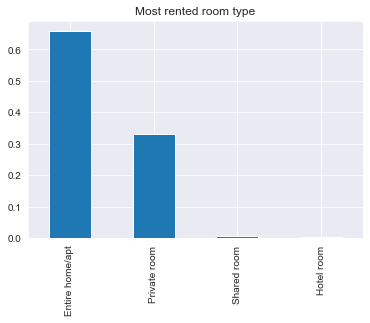

In [4]:
# The below should be a bar chart of the proportion of individuals in each room type category if your room_type_serie is set up correctly
(room_type_series/df_listings.shape[0]).plot(kind="bar");
plt.title("Most rented room type");

### Evaluate the results
Fourth and last step, Evaluate results: Boston hosts can find some exciting responses to the first question. More than 60% of guests prefer to rent the entire house or apartment, and more than 30% private rooms. Shared rooms and hotel rooms are not desired to be rented by guests.

The precise property/space types leaders are Entire home/apt and Private Room.

## Second question:

<blockquote>Do hosts know how to set the base price according to the location?</blockquote>

### analysis
 It's necessary to know how to get the location. In Airbnb Boston dataset, in the listing.cvs file, there is a column name: Neighborhood. This column will help me to get the series of neighborhood.
 I decided to obtain the top 5 of neighborhoods with more quantity of properties/spaces rental.


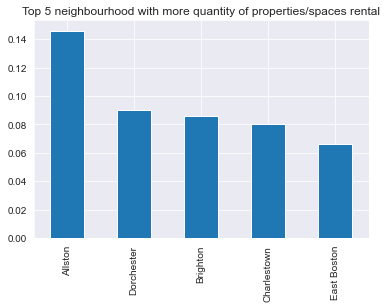

In [5]:
neighbourhood_serie = df_listings.neighbourhood.value_counts()

# The below should be a bar chart of the proportion of the top 5 neighbourhood for the individuals in your neighbourhood_serie if it is set up correctly.
(neighbourhood_serie[:5] / df_listings.shape[0]).plot(kind="bar");
plt.title("Top 5 neighbourhood with more quantity of properties/spaces rental");

### Visualization
Once I obtained the location, to get the base price I decided to calculate the mean related to  Entire home/apt and private room category per neighborhood.

In [6]:
# According to the neighbourhood and room type, which group has the highest average price? (where room_type will be the most rented (Entire home/apt or Privete Room) and the neighbourhood is in the top 5 (Allston, Dorchester, Brighton, Charlestown or  East Boston)
df_nhood_rt_price=pd.DataFrame(df_listings.query("(room_type == 'Entire home/apt' or room_type == 'Private room') and (neighbourhood == 'Allston' or neighbourhood == 'Dorchester' or neighbourhood == 'Brighton' or neighbourhood == 'Charlestown' or neighbourhood == 'East Boston') ").groupby(['neighbourhood', 'room_type']).mean()['price'])
print(df_nhood_rt_price)

                                    price
neighbourhood room_type                  
Allston       Entire home/apt  279.376884
              Private room     156.949206
Brighton      Entire home/apt  299.778226
              Private room      96.945455
Charlestown   Entire home/apt  271.333333
              Private room     102.848276
Dorchester    Entire home/apt  257.845494
              Private room     123.611650
East Boston   Entire home/apt  235.944186
              Private room      92.504854


### Evaluate the results
The first finding is interesting, the Entire home/apt has a range price value between 235.9 and 299.7, while the Private room has a range price value between 96.94 and 156.9.